## Exploratory Data Analysis of Motor Vehicle Collisions/Crashes in New York City

In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import datetime as date
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Data loading into a Data Frame

In [2]:
collision_df = pd.read_csv('data/Motor_Vehicle_Collisions_2020-2023.csv', low_memory=False)
collision_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,9/11/21,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,3/26/22,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,6/29/22,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/21,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/21,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN


### Data cleansing and preparation

In [3]:
# Converting column names to lower case for easy use

collision_df.columns = collision_df.columns.str.lower()
collision_df.head()

,crash date,crash time,borough,zip code,latitude,longitude,location,on street name,cross street name,off street name,...,contributing factor vehicle 2,contributing factor vehicle 3,contributing factor vehicle 4,contributing factor vehicle 5,collision_id,vehicle type code 1,vehicle type code 2,vehicle type code 3,vehicle type code 4,vehicle type code 5
0,9/11/21,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,3/26/22,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,6/29/22,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,9/11/21,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/21,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Details of the data frame columns

collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash date                     292931 non-null  object 
 1   crash time                     292931 non-null  object 
 2   borough                        191912 non-null  object 
 3   zip code                       191881 non-null  float64
 4   latitude                       268883 non-null  float64
 5   longitude                      268883 non-null  float64
 6   location                       268883 non-null  object 
 7   on street name                 214435 non-null  object 
 8   cross street name              136581 non-null  object 
 9   off street name                78494 non-null   object 
 10  number of persons injured      292930 non-null  float64
 11  number of persons killed       292931 non-null  float64
 12  number of pedestrians injure

In [5]:
# Check if there are duplicate records

collision_df_duplicate_rows = collision_df.duplicated().sum()
collision_df_duplicate_rows

755643

In [6]:
# To see the number of null value records for each column
collision_df.isnull().sum()

crash date                        755644
crash time                        755644
borough                           856663
zip code                          856694
latitude                          779692
longitude                         779692
location                          779692
on street name                    834140
cross street name                 911994
off street name                   970081
number of persons injured         755645
number of persons killed          755644
number of pedestrians injured     755644
number of pedestrians killed      755644
number of cyclist injured         755644
number of cyclist killed          755644
number of motorist injured        755644
number of motorist killed         755644
contributing factor vehicle 1     757066
contributing factor vehicle 2     821252
contributing factor vehicle 3    1019711
contributing factor vehicle 4    1040730
contributing factor vehicle 5    1046232
collision_id                      755644
vehicle type cod

In [7]:
# Convert date format and create year, month and day columns for later use

collision_df['crash date'] = pd.to_datetime(collision_df['crash date'])

collision_df['year'] = collision_df['crash date'].dt.year
collision_df['month'] = collision_df['crash date'].dt.month
collision_df['day'] = collision_df['crash date'].dt.day

/var/folders/kx/zt2c48k11p55j89g3r_c4k_80000gn/T/ipykernel_19865/2918756406.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  collision_df['crash date'] = pd.to_datetime(collision_df['crash date'])


In [8]:
# Check the data frame now with new columns and data types

collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   crash date                     292931 non-null  datetime64[ns]
 1   crash time                     292931 non-null  object        
 2   borough                        191912 non-null  object        
 3   zip code                       191881 non-null  float64       
 4   latitude                       268883 non-null  float64       
 5   longitude                      268883 non-null  float64       
 6   location                       268883 non-null  object        
 7   on street name                 214435 non-null  object        
 8   cross street name              136581 non-null  object        
 9   off street name                78494 non-null   object        
 10  number of persons injured      292930 non-null  float64       
 11

### Collisions by Boroughs in NYC

In [9]:
# Collisions by borough

borough_df = collision_df.groupby('borough').count()['collision_id'].reset_index(name='Number of collisions').sort_values(by='Number of collisions',ascending=False)
borough_df

,borough,Number of collisions
1,BROOKLYN,66314
3,QUEENS,52501
0,BRONX,36001
2,MANHATTAN,30235
4,STATEN ISLAND,6861


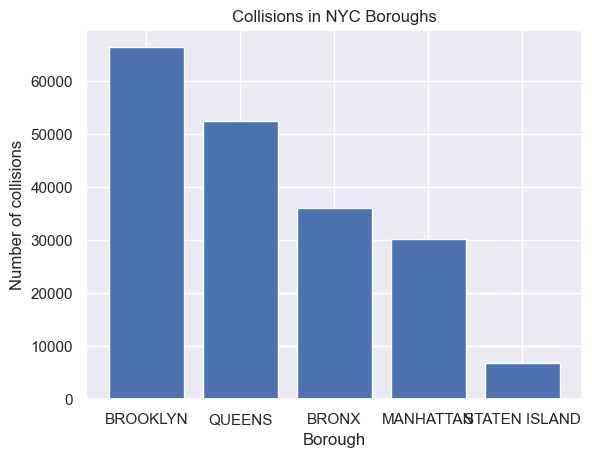

In [10]:
# Plot the bar chart to visually compare the number of collisions in New York boroughs

plt.bar(borough_df['borough'],borough_df['Number of collisions'])
plt.xlabel('Borough')
plt.ylabel('Number of collisions')
plt.title('Collisions in NYC Boroughs')

plt.show()


#### Most of the companies and primary attractions are located in Brooklyn, Queens and Manhattan that contributes to higher traffic resulting in increased accidents.

### Collisions by Years

In [11]:
# Collisions by year
year_df = collision_df.groupby('year').count()['collision_id'].reset_index(name='Count').sort_values(by='Count',ascending=False)
year_df

,year,Count
0,2020.0,112906
1,2021.0,110525
2,2022.0,69394
3,2023.0,106


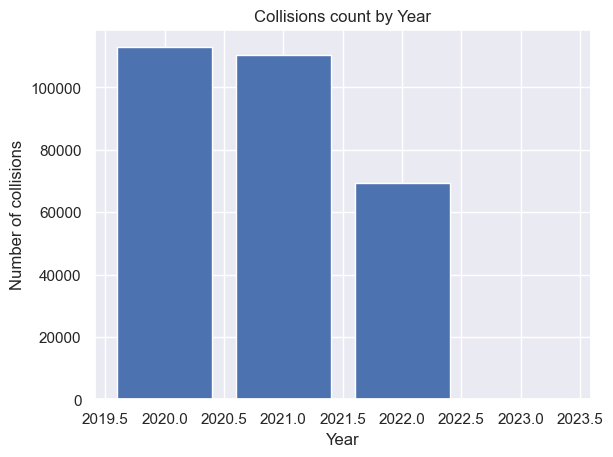

In [12]:
plt.bar(year_df['year'],year_df['Count'])
plt.xlabel('Year')
plt.ylabel('Number of collisions')
plt.title('Collisions count by Year')

plt.show()

#### The collisions have considerably reduced in recent years from 2020. One of the primary reasons could be due to Covid, when people started working remote. Also, the traffic safety initiatives by the police deparment seem to have helped to control the accidents.

### Collisions by the months

In [13]:
# Collisions by month
month_df = collision_df.groupby('month').count()['collision_id'].reset_index(name='Count').sort_values(by='Count',ascending=False)
month_df

,month,Count
0,1.0,29962
2,3.0,28182
6,7.0,28138
1,2.0,28052
7,8.0,28010
5,6.0,27700
4,5.0,25896
3,4.0,21416
8,9.0,20163
9,10.0,19943


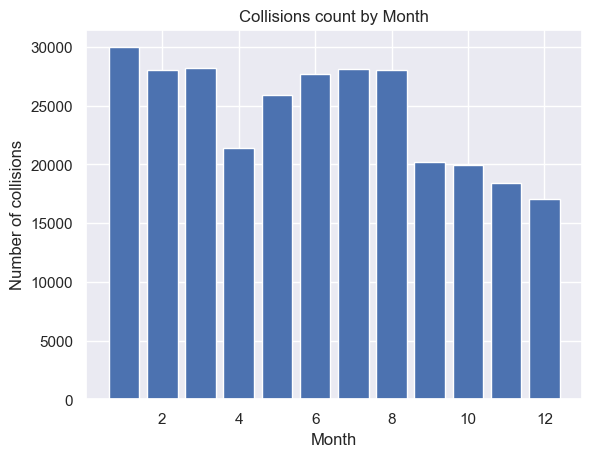

In [14]:
plt.bar(month_df['month'],month_df['Count'])
plt.xlabel('Month')
plt.ylabel('Number of collisions')
plt.title('Collisions count by Month')

plt.show()

#### During warmer months, the incident rate is relatively higher compared to months during spring and winter season. However, the difference is not significant. This could be due to different factors such as sport or festive events happening at different times of the year.

### Injuries vs Fatalities

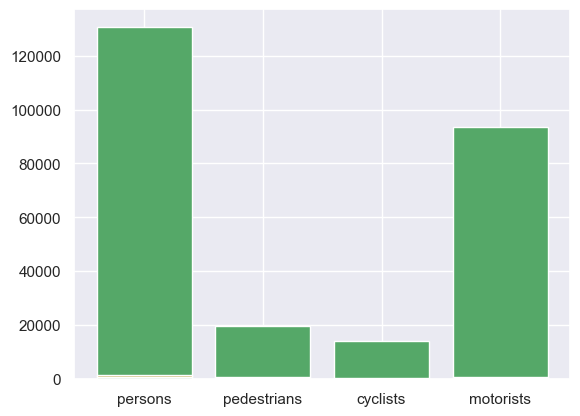

In [15]:
# To compare the injuries and fatalities from the collisions on different types of victims

victims = ['persons','pedestrians','cyclists','motorists']

injuries = [collision_df['number of persons injured'].sum(),collision_df['number of pedestrians injured'].sum(),collision_df['number of cyclist injured'].sum(),collision_df['number of motorist injured'].sum()]
fatalities = [collision_df['number of persons killed'].sum(),collision_df['number of pedestrians killed'].sum(),collision_df['number of cyclist killed'].sum(),collision_df['number of motorist killed'].sum()]


# plot stacked bar chart 
plt.bar(victims, injuries, color='g')
plt.bar(victims, fatalities, bottom=fatalities, color='y')
plt.show()





In [16]:
print([injuries,fatalities])

[[130746.0, 19723.0, 13889.0, 93369.0], [734.0, 300.0, 60.0, 348.0]]


#### The fatalities are significantly lower compared to the injuries and so they are not visible in the above stacked bar chart. You can only notice a thin yellow line at the bottom of 'persons' bar, that indicates the fatalities.

### Major factors for accidents

In [17]:
# Top 15 Contributing Factors for the accidents

factors = collision_df.groupby('contributing factor vehicle 1').count()['collision_id'].reset_index(name='Count').sort_values(by='Count', ascending=False)
factors.head(15)

,contributing factor vehicle 1,Count
50,Unspecified,74009
8,Driver Inattention/Distraction,72299
17,Following Too Closely,19477
14,Failure to Yield Right-of-Way,19461
32,Passing or Lane Usage Improper,12377
31,Passing Too Closely,10989
4,Backing Unsafely,9733
49,Unsafe Speed,9539
27,Other Vehicular,8155
46,Traffic Control Disregarded,7598


#### Except the unspecified factor on top of the list, the other prominent factors for accidents are driver inattention, failure to yield, following too closely are few among top contenders.

### Major vehicle types causing accidents

In [18]:
# Top 15 Vehicle types for the accidents

vehicles = collision_df.groupby('vehicle type code 1').count()['collision_id'].reset_index(name='Count').sort_values(by='Count', ascending=False)
vehicles.head(15)

,vehicle type code 1,Count
450,Sedan,137972
460,Station Wagon/Sport Utility Vehicle,103583
491,Taxi,8318
384,Pick-up Truck,6381
47,Box Truck,5125
51,Bus,4440
45,Bike,4044
320,Motorcycle,2273
501,Tractor Truck Diesel,2243
125,E-Bike,1840


#### Sedans, SUVs, passenger cars are dominating vehicle types to cause accidents.